<a href="https://colab.research.google.com/github/ndcastillo/eyeDiagram-Mario/blob/main/WorkShop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coseno Elevado

600
600


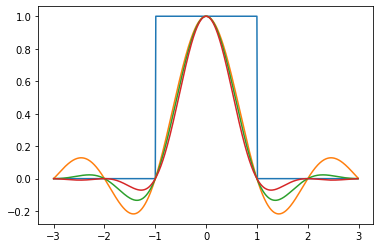

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

M = 2;
A = 1;
inbits = []; # Secuencia de Bits
N = 3; # Numero de bits
for i in range(N):
  inbits.append(round(random.random()))
inbits = np.array(inbits)
ak = (2.*inbits-1)*A

T = 1
Fs = 100
alpha = [0,0.5,0.75,1]

###########
t = np.arange(-3*T, 3*T, 1/Fs)

plt.figure()
g1 = np.sinc((t)/T)*np.cos(np.pi*alpha[0]*(t)/T)/(1-(2*alpha[0]*(t)/T)**2)
g2 = np.sinc((t)/T)*np.cos(np.pi*alpha[1]*(t)/T)/(1-(2*alpha[1]*(t)/T)**2)
g3 = np.sinc((t)/T)*np.cos(np.pi*alpha[2]*(t)/T)/(1-(2*alpha[2]*(t)/T)**2)
g4 = np.sinc((t)/T)*np.cos(np.pi*alpha[3]*(t)/T)/(1-(2*alpha[3]*(t)/T)**2)

g_ideal = (abs((t)/T)<(1/(T))).astype(int)

print(len(t))
print(len(g))
plt.plot(t,g_ideal,t,g1,t,g2,t,g3)
plt.show()


Tren de Bits
$x(t)=\sum_{k \epsilon ℤ}a_k g(t-kTs)$

## Diagrama de Ojo para $M=2$ Y $M=4$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


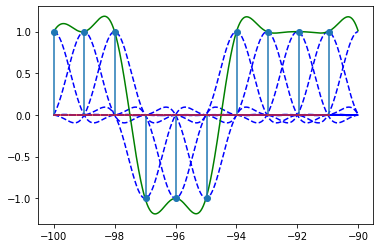

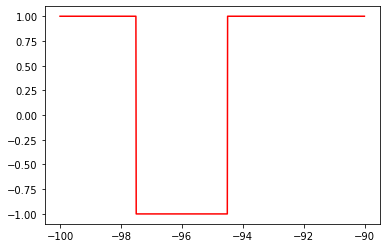

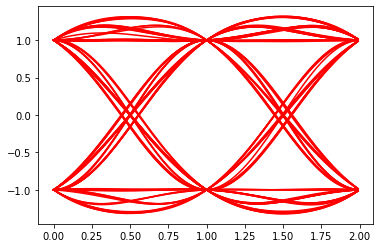

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

M = 2;
A = 1;
inbits = []; # Secuencia de Bits
N = 200; # Numero de bits
for i in range(N):
  if M == 2:
    inbits.append(round(random.random()))
  if M == 4:
    inbits.append((2/3)*random.randint(0,3)-1)
inbits = np.array(inbits)
if M == 2:
  ak = (2.*inbits-1)*A
if M == 4:
  ak = inbits

T = 1
Fs = 100
alpha = 0.65

###########
t = np.arange(-(N/2)*T, (N/2)*T, 1/Fs)

plt.figure()
for i in range(-round(N/2),round(N/2)):
  if i == -round(N/2):
    g = ak[i+round(N/2)]*np.array([np.sinc((t-i*T)/T)*np.cos(np.pi*alpha*(t-i*T)/T)/(1-(2*alpha*(t-i*T)/T)**2)])
    g_ideal = np.array([ak[i+round(N/2)]*np.array((abs((t-i*T)/T)<(1/(2*T))).astype(int))])

    g_suma = g[0,:]
    g_suma_ideal = g_ideal[0,:]
  else:
    g = ak[i+round(N/2)]*np.append(g, [np.sinc((t-i*T)/T)*np.cos(np.pi*alpha*(t-i*T)/T)/(1-(2*alpha*(t-i*T)/T)**2)],axis=0) # Señal Coseno Elevado
    dd=(abs((t-i*T)/T)<(1/(2*T))).astype(int)
    g_ideal = ak[i+round(N/2)]*np.append(g_ideal,[dd],axis=0)

    g_suma = g_suma + g[-1,:] 
    g_suma_ideal = g_suma_ideal + g_ideal[-1,:]
  plt.plot(t[0:1000],g[-1,0:1000],'b--')


plt.plot(t[0:1000],g_suma[0:1000],'g')
plt.stem(np.linspace(-round(N/2),round(N/2),num=len(ak))[0:10],ak[0:10])
plt.show()

plt.figure()
plt.plot(t[0:1000],g_suma_ideal[0:1000],'r')
plt.show()

nuevo = g_suma.reshape((round(N/2),2*Fs))

plt.figure()
t = np.arange(0, 2*T, 1/Fs)

for i in range(round(N/2)-1):
  plt.plot(t,nuevo[i,:],'r')

plt.show()

**Entradas**
- Type: RZ, NRZ, P-NRZ, P-RZ, Manchester
- Inbits: input bits 
- $T_b$: Bit time period
- $A$: Amplitude of the conding
- $T_s$: Sampling time

## Efecto del Ruido del Canal
Se recuerda que:
$$
SNR = \frac{E_b}{N_o}
$$
Donde $E_b=A^2 T_b$ y $N_o = \sigma_N^2 + \mu_N^2$
### Entradas
SNR = [5dB,10dB,15dB,20dB]

0.025


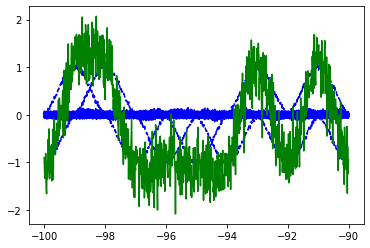

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


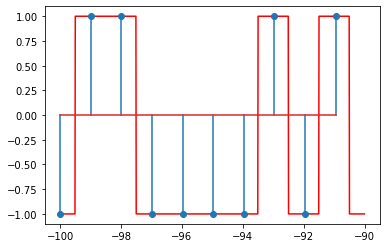

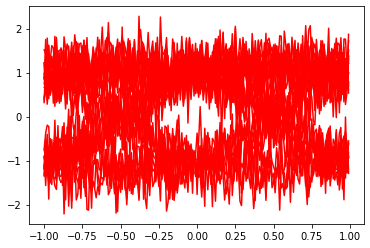

In [ ]:
Tb = T;
SNR_db = 20
SNR = 10**(SNR_db/10)
Vpp=2*A
S = (((A/2)**2)*Tb)/4;
No = S/SNR

sigma = No**(0.5)
print(sigma)

# for i in range(len(ak)):
#   bk.append((1+((sigma)**(0.5))*np.random.randn())*ak[i]) # Bits con ruido
bk=ak
###########
t = np.arange(-(N/2)*T, (N/2)*T, 1/Fs)

def add_awgn(i):
  y = np.sinc((t-i*T)/T)*np.cos(np.pi*alpha*(t-i*T)/T)/(1-(2*alpha*(t-i*T)/T)**2)
  for j in range(len(y)):
    y[j] = y[j] + (sigma)*np.random.randn()
  return y
    
plt.figure()
for i in range(-round(N/2),round(N/2)):
  if i == -round(N/2):
    g = bk[i+round(N/2)]*np.array([add_awgn(i)])
    g_ideal = np.array([bk[i+round(N/2)]*np.array((abs((t-i*T)/T)<(1/(2*T))).astype(int))])

    g_suma = g[0,:]
    g_suma_ideal = g_ideal[0,:]
  else:
    g = bk[i+round(N/2)]*np.append(g, [add_awgn(i)],axis=0) # Señal Coseno Elevado
    dd=(abs((t-i*T)/T)<(1/(2*T))).astype(int)
    g_ideal = bk[i+round(N/2)]*np.append(g_ideal,[dd],axis=0)

    g_suma = g_suma + g[-1,:] 
    g_suma_ideal = g_suma_ideal + g_ideal[-1,:]
  plt.plot(t[0:1000],g[-1,0:1000],'b--')

plt.plot(t[0:1000],g_suma[0:1000],'g')
plt.show()

plt.figure()
plt.plot(t[0:1000],g_suma_ideal[0:1000],'r')
plt.stem(np.linspace(-round(N/2),round(N/2),num=len(bk))[0:10],bk[0:10])
plt.show()

nuevo = g_suma.reshape((round(N/2),2*Fs))

plt.figure()
t = np.arange(-T, T, 1/Fs)

for i in range(25):
  plt.plot(t,nuevo[i,:],'r')

plt.show()


## Capacidad del Canal
$$
f_c = 0.975
$$
$$
f_c = 0.5
$$
Es preciso configurar un filtro Butterworth

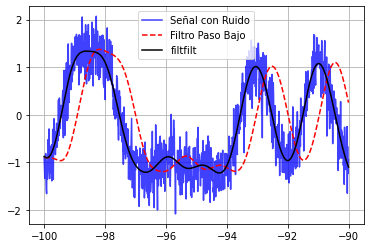

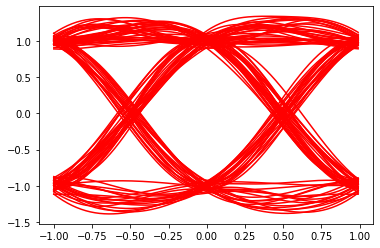

In [ ]:
## Lammar a los modulos scipy
import scipy

## Parametros de entrada
t = np.arange(-(N/2)*T, (N/2)*T, 1/Fs)
xn = g_suma

for i in range(len(g_suma)):
  xn[i] = g_suma[i] 
fc=1
fc_normalizada=(2*fc)/Fs
b, a = scipy.signal.butter(5, fc_normalizada)

zi = scipy.signal.lfilter_zi(b, a)
z, _ = scipy.signal.lfilter(b, a, xn, zi=zi*xn[0])
ff = scipy.signal.filtfilt(b, a, xn)

plt.figure()
plt.plot(t[0:1000], xn[0:1000], 'b', alpha=0.75)
plt.plot(t[0:1000], z[0:1000], 'r--',t[0:1000], ff[0:1000], 'k')
plt.legend(('Señal con Ruido', 'Filtro Paso Bajo','filtfilt'))
plt.grid(True)
plt.show()


nuevo = ff.reshape((round(N/2),2*Fs))

plt.figure()
t = np.arange(-T, T, 1/Fs)

for i in range(round(N/2)-1):
  plt.plot(t,nuevo[i,:],'r')

plt.show()
